# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 613


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?appid=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    weather_data = requests.get(city_url).json()

    # normalizing JSON, converting to dataframe
    # city_data =pd.json_normalize(weather_data)
    
    try:
        # Parse the JSON and retrieve data
        city_weather = weather_data['weather'][0]['description']

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = weather_data['coord']['lat']
        city_lng = weather_data['coord']['lon']
        city_max_temp = weather_data['main']['temp_max']
        city_humidity = weather_data['main']['humidity']
        city_clouds = weather_data['clouds']['all']
        city_wind = weather_data['wind']['speed']
        city_country = weather_data['sys']['country']
        city_date = weather_data['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass


# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | iqaluit
Processing Record 2 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 3 of Set 1 | pevek
Processing Record 4 of Set 1 | punta arenas
Processing Record 5 of Set 1 | gold coast
Processing Record 6 of Set 1 | karratha
Processing Record 7 of Set 1 | jeremie
Processing Record 8 of Set 1 | hoquiam
Processing Record 9 of Set 1 | rikitea
Processing Record 10 of Set 1 | vila franca do campo
Processing Record 11 of Set 1 | avarua
Processing Record 12 of Set 1 | ous
Processing Record 13 of Set 1 | puerto ayora
Processing Record 14 of Set 1 | port elizabeth
Processing Record 15 of Set 1 | jamestown
Processing Record 16 of Set 1 | samusu
City not found. Skipping...
Processing Record 17 of Set 1 | chuy
Processing Record 18 of Set 1 | kamenka
Processing Record 19 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 20 of Set 1 | palabuhanratu
City not foun

City not found. Skipping...
Processing Record 38 of Set 4 | banes
Processing Record 39 of Set 4 | fairbanks
Processing Record 40 of Set 4 | tasiilaq
Processing Record 41 of Set 4 | geraldton
Processing Record 42 of Set 4 | khatanga
Processing Record 43 of Set 4 | rovaniemi
Processing Record 44 of Set 4 | tabiauea
City not found. Skipping...
Processing Record 45 of Set 4 | chimoio
Processing Record 46 of Set 4 | santiago del estero
Processing Record 47 of Set 4 | sonari
Processing Record 48 of Set 4 | bambous virieux
Processing Record 49 of Set 4 | labuan
Processing Record 0 of Set 5 | severo-kurilsk
Processing Record 1 of Set 5 | chunhuhub
Processing Record 2 of Set 5 | yining
Processing Record 3 of Set 5 | cherskiy
Processing Record 4 of Set 5 | san felipe
Processing Record 5 of Set 5 | barentsburg
City not found. Skipping...
Processing Record 6 of Set 5 | amahai
Processing Record 7 of Set 5 | itapirapua
Processing Record 8 of Set 5 | grand-santi
Processing Record 9 of Set 5 | chute-a

Processing Record 30 of Set 8 | namatanai
Processing Record 31 of Set 8 | saint anthony
Processing Record 32 of Set 8 | kawalu
Processing Record 33 of Set 8 | alcaniz
Processing Record 34 of Set 8 | ulaanbaatar
Processing Record 35 of Set 8 | mys shmidta
City not found. Skipping...
Processing Record 36 of Set 8 | kantang
Processing Record 37 of Set 8 | sitka
Processing Record 38 of Set 8 | calahorra
Processing Record 39 of Set 8 | mahibadhoo
Processing Record 40 of Set 8 | marcona
City not found. Skipping...
Processing Record 41 of Set 8 | la mana
Processing Record 42 of Set 8 | rungata
City not found. Skipping...
Processing Record 43 of Set 8 | birmensdorf
Processing Record 44 of Set 8 | salvador
Processing Record 45 of Set 8 | pangnirtung
Processing Record 46 of Set 8 | sentyabrskiy
City not found. Skipping...
Processing Record 47 of Set 8 | campina verde
Processing Record 48 of Set 8 | praia da vitoria
Processing Record 49 of Set 8 | bulalacao
Processing Record 0 of Set 9 | west bay

Processing Record 17 of Set 12 | raudeberg
Processing Record 18 of Set 12 | manavalakurichi
Processing Record 19 of Set 12 | port hawkesbury
Processing Record 20 of Set 12 | sept-iles
Processing Record 21 of Set 12 | verkhnyaya inta
Processing Record 22 of Set 12 | koungou
Processing Record 23 of Set 12 | marawi
Processing Record 24 of Set 12 | sao filipe
Processing Record 25 of Set 12 | eenhana
Processing Record 26 of Set 12 | barra patuca
Processing Record 27 of Set 12 | naze
Processing Record 28 of Set 12 | flinders
Processing Record 29 of Set 12 | hsichih
City not found. Skipping...
Processing Record 30 of Set 12 | monaragala
Processing Record 31 of Set 12 | banjarmasin
Processing Record 32 of Set 12 | zonguldak
Processing Record 33 of Set 12 | bakel
Processing Record 34 of Set 12 | cassilandia
Processing Record 35 of Set 12 | cazaje
City not found. Skipping...
Processing Record 36 of Set 12 | grimshaw
Processing Record 37 of Set 12 | dwarka
Processing Record 38 of Set 12 | isangel

In [48]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data_df)

# Show Record Count
city_data_df.count()

City          567
Lat           567
Lng           567
Max Temp      567
Humidity      567
Cloudiness    567
Wind Speed    567
Country       564
Date          567
dtype: int64

In [49]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,iqaluit,63.7506,-68.5145,-24.15,70,100,5.66,CA,1674578860
1,pevek,69.7008,170.3133,-25.18,73,94,1.38,RU,1674578754
2,punta arenas,-53.1500,-70.9167,12.01,46,40,14.40,CL,1674578547
3,gold coast,-28.0000,153.4333,23.43,93,40,1.54,AU,1674579051
4,karratha,-20.7377,116.8463,28.90,68,52,2.11,AU,1674578737


In [50]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [51]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,iqaluit,63.7506,-68.5145,-24.15,70,100,5.66,CA,1674578860
1,pevek,69.7008,170.3133,-25.18,73,94,1.38,RU,1674578754
2,punta arenas,-53.1500,-70.9167,12.01,46,40,14.40,CL,1674578547
3,gold coast,-28.0000,153.4333,23.43,93,40,1.54,AU,1674579051
4,karratha,-20.7377,116.8463,28.90,68,52,2.11,AU,1674578737


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

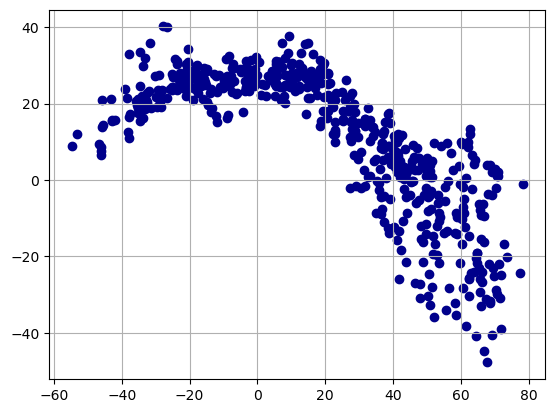

In [82]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df["Lat"]
y_values = city_data_df["Max Temp"]
plt.scatter(x_values, y_values, color = "darkblue")

# Incorporate the other graph properties
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

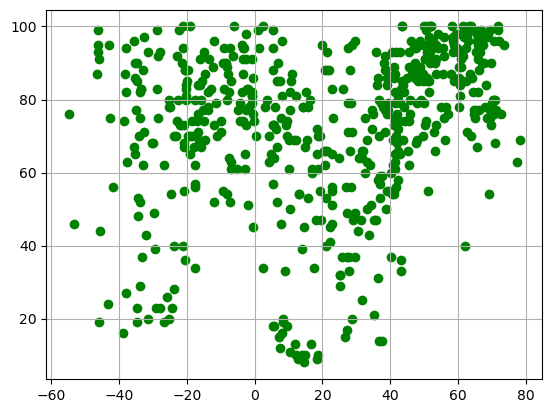

In [81]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df["Lat"]
y_values = city_data_df["Humidity"]
plt.scatter(x_values, y_values, color = "green")

# Incorporate the other graph properties
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

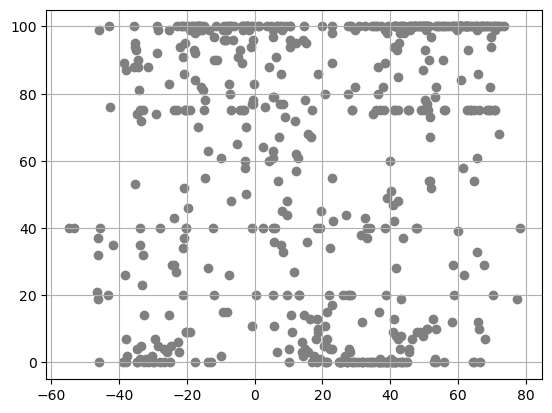

In [83]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df["Lat"]
y_values = city_data_df["Cloudiness"]
plt.scatter(x_values, y_values, color = "gray")

# Incorporate the other graph properties
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

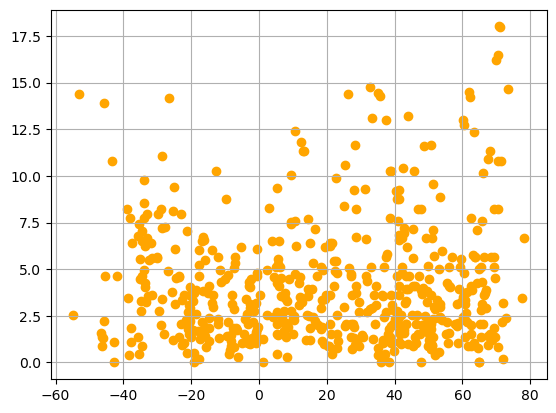

In [87]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df["Lat"]
y_values = city_data_df["Wind Speed"]
plt.scatter(x_values, y_values, color = "orange")

# Incorporate the other graph properties
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [73]:
# Define a function to create Linear Regression plots
def linear_regression(x,y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
    regress_values = x * slope + intercept
    line = "y" + str(round(slope, 2)) + "x + str(round(intercept, 2))"
    plt.scatter(x,y)
    plt.grid()
    plt.plot(x, regress_values, "r-")
    plt.show()

In [20]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,iqaluit,63.7506,-68.5145,-24.15,70,100,5.66,CA,1674578860
1,pevek,69.7008,170.3133,-25.18,73,94,1.38,RU,1674578754
5,jeremie,18.6500,-74.1167,27.48,61,9,3.35,HT,1674579052
6,hoquiam,46.9809,-123.8893,8.33,94,100,1.54,US,1674579006
8,vila franca do campo,37.7167,-25.4333,15.23,78,82,5.80,PT,1674578859


In [21]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,punta arenas,-53.1500,-70.9167,12.01,46,40,14.40,CL,1674578547
3,gold coast,-28.0000,153.4333,23.43,93,40,1.54,AU,1674579051
4,karratha,-20.7377,116.8463,28.90,68,52,2.11,AU,1674578737
7,rikitea,-23.1203,-134.9692,26.05,70,27,7.95,PF,1674578932
9,avarua,-21.2078,-159.7750,22.03,100,34,0.51,CK,1674578978


###  Temperature vs. Latitude Linear Regression Plot

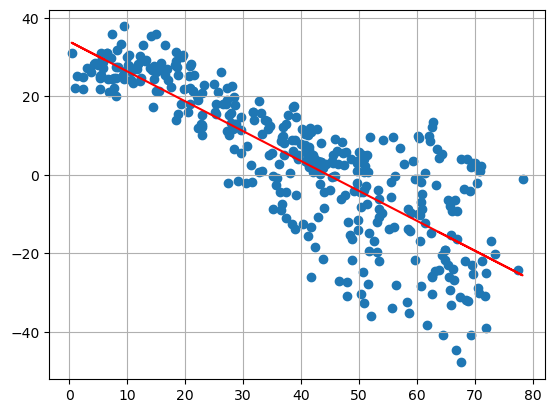

In [68]:
# Linear regression on Northern Hemisphere
temp_north = linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])
temp_north

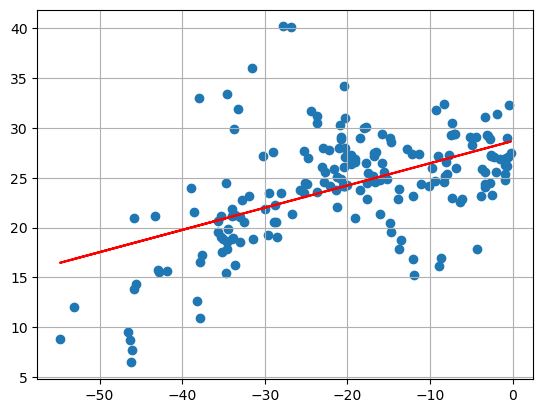

In [47]:
# Linear regression on Southern Hemisphere
temp_south = linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])
temp_south

**Discussion about the linear relationship:** Looking at the scatter plots, it seems that the Northern Hemisphere has maximum temperatures that are lower than that of the Southern Hemispheres. The correlation of the North seems to be in the negatives compared to the South that looks to be in the positive.

### Humidity vs. Latitude Linear Regression Plot

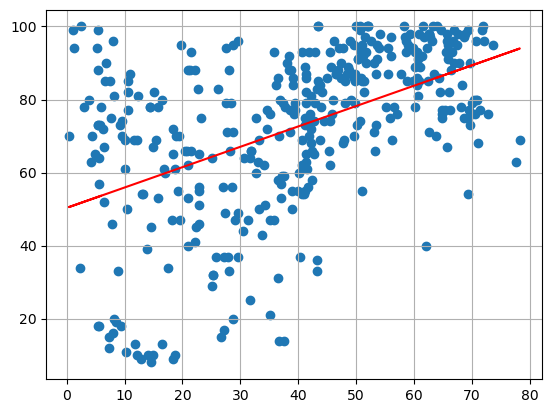

In [39]:
# Northern Hemisphere
humidity_north = linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])
humidity_north

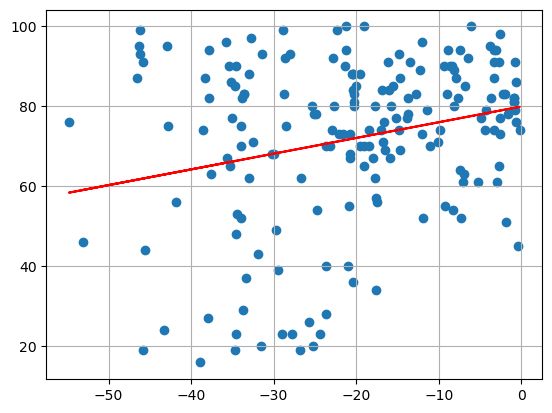

In [41]:
# Southern Hemisphere
humidity_south = linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])
humidity_south

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

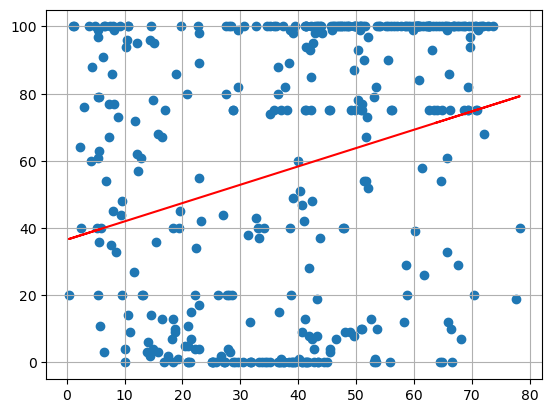

In [42]:
# Northern Hemisphere
cloud_north = linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])
cloud_north

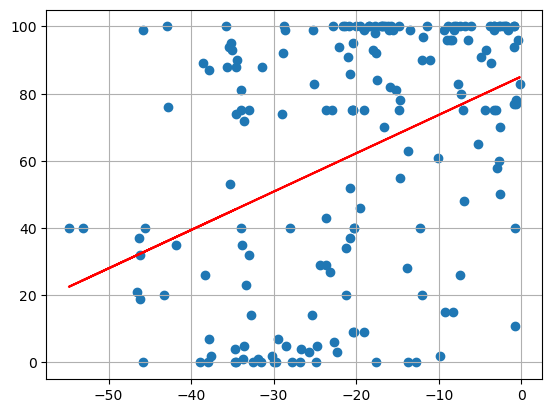

In [43]:
# Southern Hemisphere
cloud_south = linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])
cloud_south

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

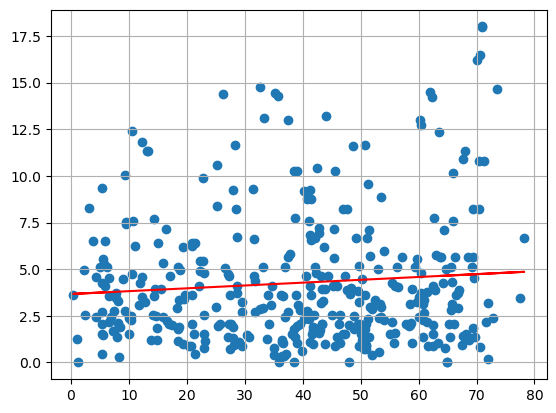

In [44]:
# Northern Hemisphere
wind_north = linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])
wind_north

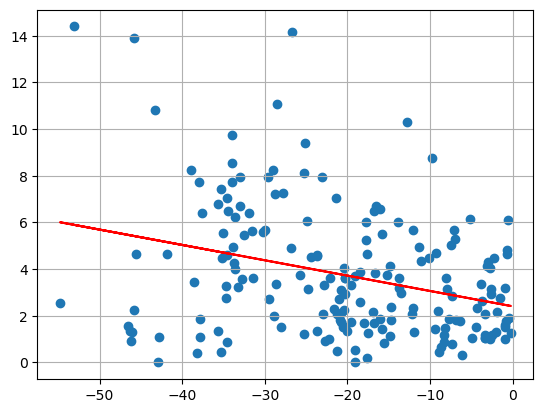

In [74]:
# Southern Hemisphere
wind_south = linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])
wind_south

**Discussion about the linear relationship:** Looking at both scatter plots, it seems that the wind speeds within the Northern Hemisphere are not as positive in both higher and lower latitudes compared to the Southern Hemisphere, where it seems the wind speeds are more negative.